In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features, artists, styles, classes = [], [], [], []
for feature_file in os.listdir('./features_lum'):
    artist, style = feature_file.replace('.npy', '').split('_')[:2]
    feature = np.load(os.path.join('./features_lum', feature_file))
    features.extend([i for i in feature])
    artists.extend([artist] * len(feature))
    styles.extend([style] * len(feature))
    classes.extend([feature_file.replace('.npy', '').replace('_lum', '')] * len(feature))
df = pd.DataFrame({'feature': features, 'artist': artists, 'style': styles, 'class': classes})
df.head()

,feature,artist,style,class
0,"[2.9134505, 2.876359, 1.7080597, 1.5484529, 0....",claude-monet,Impressionism,claude-monet_Impressionism
1,"[45.08527, 14.866305, 15.270366, 29.600912, 11...",claude-monet,Impressionism,claude-monet_Impressionism
2,"[18.826336, 9.36756, 9.509296, 10.811928, 5.95...",claude-monet,Impressionism,claude-monet_Impressionism
3,"[31.767382, 9.127517, 7.704503, 24.303991, 8.6...",claude-monet,Impressionism,claude-monet_Impressionism
4,"[20.49625, 8.454241, 7.4471445, 13.548885, 5.0...",claude-monet,Impressionism,claude-monet_Impressionism


In [3]:
# subset = df[df['artist'] == 'pablo-picasso']
# subset = df[df['style'] == 'Impressionism']
# subset = df[(df['style'] == 'Realism') | (df['style'] == 'Impressionism')]
subset = df[(df['class'] == 'claude-monet_Impressionism') | (df['class'] == 'vincent-van-gogh_Post_Impressionism') | (df['class'] == 'katsushika-hokusai_Ukiyo_e')]
pca = PCA(n_components=50)
pca_50 = pca.fit_transform(np.stack(subset['feature'].values))
print(np.sum(pca.explained_variance_ratio_))

0.9628962


In [4]:
# subset[['class', 'style', 'artist']].to_csv('metadata.tsv', sep='\t', index=False)

In [5]:
# np.savetxt('features.tsv', pca_50, delimiter='\t', fmt='%.3f')

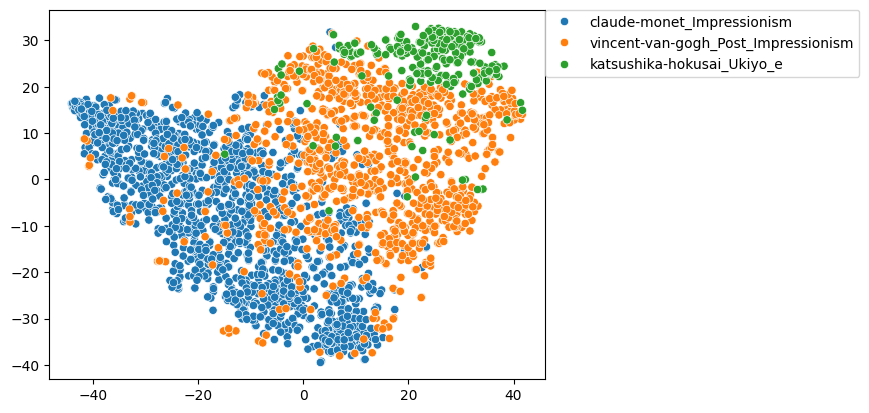

In [6]:
# for perplexity in [2, 5, 30, 50, 100]:
#     print(perplexity)
perplexity = 50
tsne = TSNE(perplexity=perplexity)
# pca = PCA(n_components=2)
# pca.fit(np.stack(subset['feature'].values))
# tsne_x, tsne_y = pca.transform(np.stack(subset['feature'].values)).T
tsne_x, tsne_y = tsne.fit_transform(pca_50).T
plt.figure()
sns.scatterplot(x=tsne_x, y=tsne_y, hue=subset['class'].values)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

/home/yanlin/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


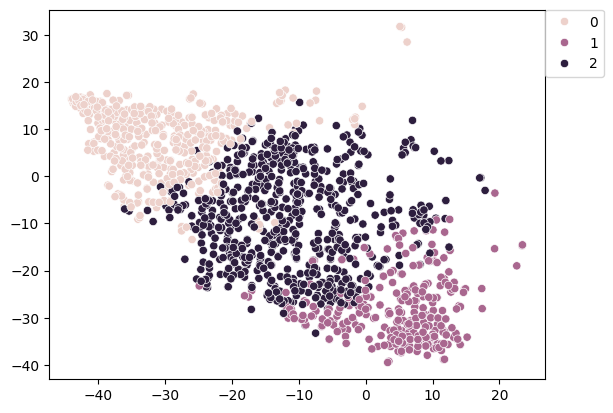

/home/yanlin/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


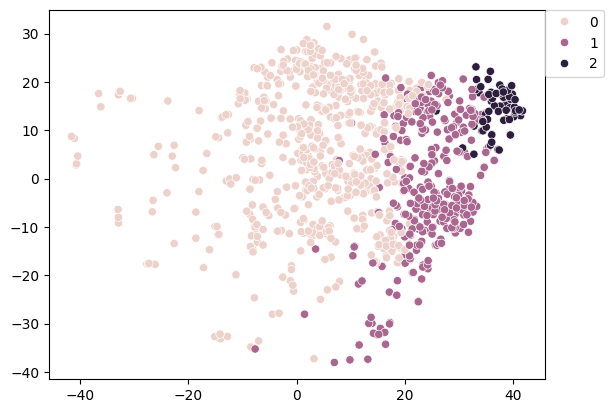

/home/yanlin/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


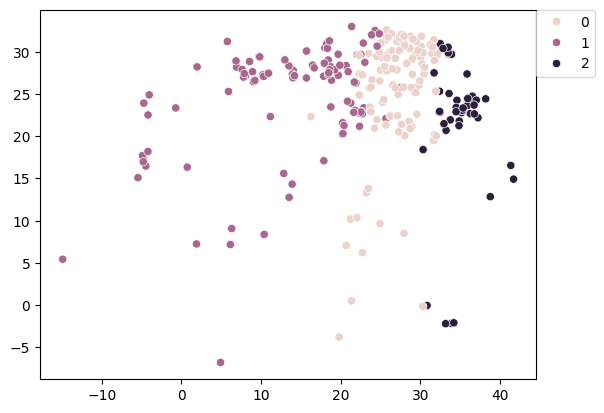

In [7]:
from sklearn.cluster import kmeans_plusplus, KMeans, k_means

labels = np.zeros(pca_50.shape[0])
for cls in subset['class'].unique():
    # print(pca_50[subset['class'] == cls].shape)
    centroid, label, _ = k_means(pca_50[subset['class'] == cls], n_clusters=3)
    plt.figure()
    sns.scatterplot(x=tsne_x[subset['class'] == cls], y=tsne_y[subset['class'] == cls], hue=label)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()

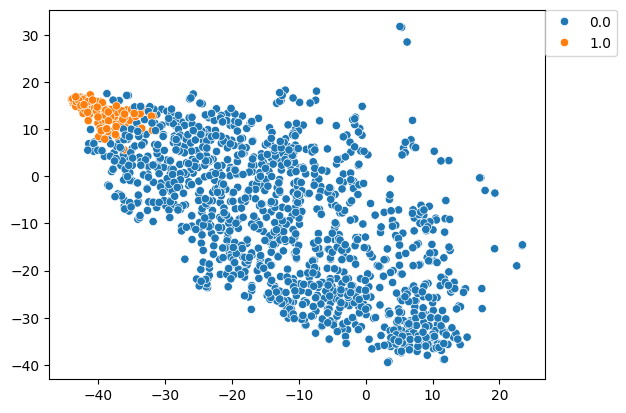

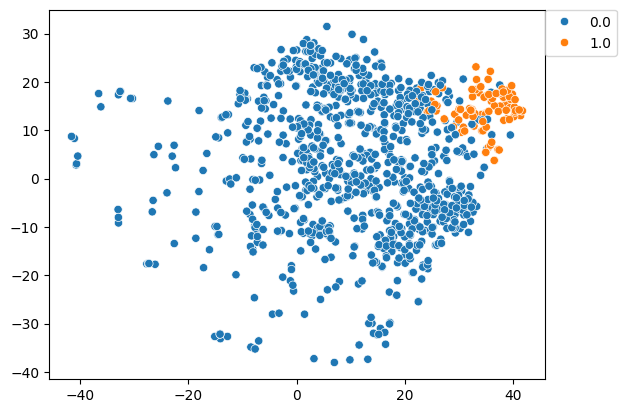

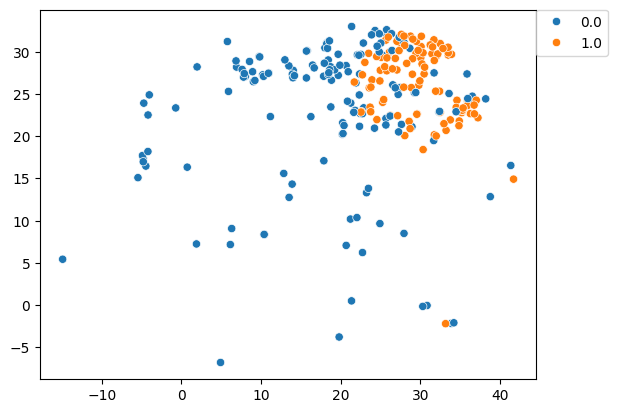

In [13]:
from scipy.spatial.distance import pdist, squareform

k = 100
for cls in subset['class'].unique():
    V = pca_50[subset['class'] == cls]
    dist = squareform(pdist(V, 'cosine'))
    knns = [np.argsort(dist[i])[:k] for i in range(V.shape[0])]
    centroid_idx = np.argmin([np.max([dist[i][j] for i in knn for j in knn]) for knn in knns])
    label = np.zeros(V.shape[0])
    label[knns[centroid_idx]] = 1
    plt.figure()
    sns.scatterplot(x=tsne_x[subset['class'] == cls], y=tsne_y[subset['class'] == cls], hue=label)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()